# ***Projeto de Métodos Numéricos*** - A Progressão Do Covid-19 em Pernambuco
### **Aluno:** *João Gabriel de Araújo Vasconcelos*



Para feitura do projeto, dispomos da utilização do modelo *SIR* (Suscetiveis, Infectados e Recuperados), a fim de embasar o comportamento da curva de infectados em relação à inclusão de novas semanas epidemológicas, analisando como o *isolamento social* interfere no comportamento da evoução desta curva. O intuito da pesquisa em questão é apresentar uma previsão que se aproxime do cenário real e que, com resultados práticos, possa previsionar possíveis medidas a serem tomadas com o potencial de mitigar o agravamento epidêmico.

É importante ressaltar que o modelo *SIR* utilizado deve conter potenciais variações com a finalidade de adequar os resultados ao Estado de Pernambuco.

---

###Análise

Quanto ao Modelo *SIR* empregado no Projeto:

Pelo modelo SIR (Suscetível, Infectado e Recuperado), desenvolvido por Kermack e McKendrick em 1927, consideramos a análise de uma população fixada em *N* indivíduos que, divídida em 3 "compartimentos", deve variar ao longo do tempo a medida que a epidemia evolui. Dentre tais compartimento, *S(t)* refere-se aos indivíduos Suscetíveis ao vírus, *I(t)* refere-se aos indivíduos Infectados pelo vírus, e *R(t)* refere-se aos indivíduos recuperados pelo mesmo (visto que as pesquisas referentes a possíveis mutações do vírus e a casos isolados de reinfecção ainda são muito primordiais, o "compartimento" de recuperados deve inferir a impossibilidade de reinfecção por pacientes já recuperados). 

Nas equações nas quais utilizaremos os dados previamente citados, devemos incluir a análise de *2* parâmetros que constituirão a composição de cada compartimento:

>.β - Descreve a taxa efetiva de contato ao vírus; Um paciente infectado deve entrar em contato com βN outros pacientes por unidade de tempo, sendo a fração suscetível a contrair a doença *S/N*.


>.γ - Descreve a taxa média de recuperação dos pacientes; Logo, *1/*γ descreve o período médio tempo que um único indivíduo pode transmitir o vírus.

Temos o modelo descrito em 3 Equações Diferenciais:

\begin{align}
\frac{{\rm d}S}{{\rm d}t} & = -\beta S I / N\\
\frac{{\rm d}I}{{\rm d}t} & = \beta S I / N - \gamma I\\
\frac{{\rm d}R}{{\rm d}t} & = \gamma I\\
\end{align}

Desenvolvemos nossas previsões com base nos seguintes *Dados* (relativos à PE):

* Número de Habitantes (*N*) : *9.616.621 Indivíduos*
* Número Atual de Infectados (*Io*) : *143.703 Infectados*
* Número Atual de Recuperados (*Ro*) : *118.570 Recuperados*
* Número Atual de Óbitos (*Oo*) : *8.110 Óbitos*
* Taxa de Contato ao Vírus (β) : *0,58*
* Taxa Média de Recuperação (γ) : *(1 / 5,1)* + *k*
* Taxa de Mortalidade Estipulada (*M*) : *(Oo / Io)* **≅** *0,0564358434*

Inserimos no nosso modelo alguns parâmetros complementares ao método primitivo SIR, a fim de tornar a análise mais fiel ao quadro real, além de analisar a efetividade específica do isolamento social como elemento remediador da  epidemia:

>Consideramos um potêncial Período de Infecção (*P*) de 6 dias dentre a detecção do vírus em um indivíduo e sua disposição em um quadro de isolamento.



Logo, como sabemos que *1/γ* descreve o período que um indivíduo pode transmitir o vírus, temos : *1/γ* = 6 ; *γ* = 1/6 ≅ 0.166

Embasamos nosso estudo em uma variável complemetar *A* ( podendo variar de 0.0 a 2.0), que irá representar a instanciação do isolamento social durante a evolução epidêmica, o que nos provê as seguintes equações, além de também considerar a análise dos Óbitos provenientes da pandemia.

A = 0.0 Indica uma condição a qual não há Isolamento Social

\begin{align}
\frac{{\rm d}S}{{\rm d}t} & = -(\beta S I )(1 - A)/ N\\
\frac{{\rm d}I}{{\rm d}t} & = (\beta S I)(1 - A)/ N - \gamma I\ + M I\\
\frac{{\rm d}R}{{\rm d}t} & = \gamma I\\
\frac{{\rm d}O}{{\rm d}t} & = M I\\
\end{align}

###PONDERAÇÕES:



O Modelo em estudo trabalha com dados providos por fontes tais como o Instituto Brasileiro de Geografia e Estatística (IBGE), o Ministério da Saúde, entre outras que serão mencionadas em uma sessão separada.

Analisamos os casos, primeiramente, desconsiderando a existência de isolamento social como medida remediadora (em um período de 3 meses).

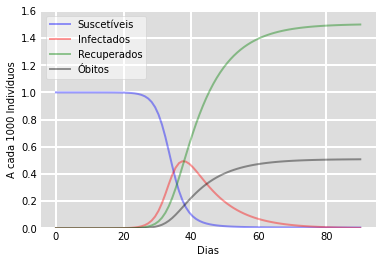

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

A = 0.00

N = 9616621
P = 6
M = 0.0564358434

gamma = 1/P
beta = 0.58
R0 = beta/gamma

i0, r0, o0 = 1, 0, 0
s0 = N - i0 - r0
x0 = [s0, i0, r0, o0]

def projecao(x,t):
    s, i, r, o = x
    dx = np.zeros(4)
    dx[0] = -(beta*s*i*(1 - A))/N
    dx[1] = (beta*s*i*(1 - A))/N - gamma*i + M*i
    dx[2] = gamma*i
    dx[3] = M*i
    return dx

t = np.linspace(0, 90, 90)
x = odeint(projecao, x0, t)
s, i, r, o = x[:,0], x[:,1], x[:,2], x[:,3] 

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, s/N, 'blue', alpha=0.4, lw=2, label='Suscetíveis')
ax.plot(t, i/N, 'red', alpha=0.4, lw=2, label='Infectados')
ax.plot(t, r/N, 'green', alpha=0.4, lw=2, label='Recuperados')
ax.plot(t, o/N, 'black', alpha=0.4, lw=2, label='Óbitos')
ax.set_xlabel('Dias')
ax.set_ylabel('A cada 1000 Indivíduos')
ax.set_ylim(0,1.6)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

Analisamos agora considerando a existência de isolamento social como medida remediadora (em um período de 3 meses).

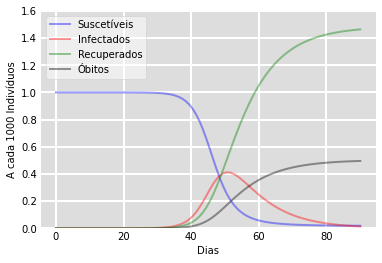

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

A = 0.22

N = 9616621
P = 6
M = 0.0564358434

gamma = 1/P
beta = 0.58
R0 = beta/gamma

i0, r0, o0 = 1, 0, 0
s0 = N - i0  -r0
x0 = [s0, i0, r0, o0]

def projecao(x,t):
    s, i, r, o = x
    dx = np.zeros(4)
    dx[0] = -(beta*s*i*(1 - A))/N
    dx[1] = (beta*s*i*(1 - A))/N - gamma*i + M*i
    dx[2] = gamma*i
    dx[3] = M*i
    return dx

t = np.linspace(0, 90, 90)
x = odeint(projecao, x0, t)
s, i, r, o = x[:,0], x[:,1], x[:,2], x[:,3]

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, s/N, 'blue', alpha=0.4, lw=2, label='Suscetíveis')
ax.plot(t, i/N, 'red', alpha=0.4, lw=2, label='Infectados')
ax.plot(t, r/N, 'green', alpha=0.4, lw=2, label='Recuperados')
ax.plot(t, o/N, 'black', alpha=0.4, lw=2, label='Óbitos')
ax.set_xlabel('Dias')
ax.set_ylabel('A cada 1000 Indivíduos')
ax.set_ylim(0,1.6)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.savefig('sir.pdf')
plt.show()

###Considerações

Dessarte, percebemos que, com a instutuição do isolamento social (contingente de medidas como a realização de eventos virtuais em prol de eventos presenciais), houve um retardo de aproximadamente 10 dias, em um universo de 3 meses (o que corresponde a *11,1%*), em relação ao aumento da curva de infectados na região, o que corresponderia há um maior intevalo de tempo no qual poderiam ser instituídas novas medidas com o intuito de mitigar a evolução da epidemia. Além disso, é vista uma diminuição no número esperado de mortos após os 3 meses analisados ( correspondente à assíntota horizontal da *curva preta* - óbitos), em decorrência da redução em 0.1 do número de infectados a cada 1000 habitantes no último período.

###Fontes

- https://g1.globo.com/pe/pernambuco/noticia/2020/10/18/pernambuco-tem-156029-casos-da-covid-19-e-8487-mortes-depois-de-registrar-mais-106-infectados-e-7-obitos.ghtml
- http://www.enf.ufmg.br/images/28.03-Previsoes-de-infecccao-pelo-COVID-19.pdf.pdf
- https://www.medrxiv.org/content/10.1101/2020.05.15.20103077v1.full.pdf
- https://www.ibge.gov.br/
- https://www.gov.br/saude/pt-br
- https://www2.ufrb.edu.br/bcet/components/com_chronoforms5/chronoforms/uploads/tcc/20190604222258_2017.2__TCC_Fellipe_Souza_-_Transformadas_de_Laplace_em_Circuitos_Eltricos_Rlc.pdf
- https://www.scielo.br/scielo.php?pid=S1806-11172012000200016&script=sci_arttext#:~:text=A%20transformada%20de%20Laplace%20e,nas%20ci%C3%AAncias%20exatas%20e%20engenharias.&text=Nessas%20aplica%C3%A7%C3%B5es%20costuma%2Dse%20interpret%C3%A1,para%20o%20dom%C3%ADnio%20de%20frequ%C3%AAncias.
- https://www.ufrgs.br/reamat/TransformadasIntegrais/livro-tl/tdl-dexfb01nix00e7x00e3o_de_transformada_de_laplace.html
- «Des Fonctions génératrices» [On generating functions], ThéorieanalytiquedesProbabilités [Analytical Probability Theory] (em francês)2nd ed., Paris,1814,chap.I sect.2-20
-
a b c SAUTER, Esequia; AZEVEDO, Fábio; STRAUCH, Irene (15 de maio de
2019). «REAMAT - Transformada de Laplace» (PDF). Universidade Federal
do Rio Grande do Sul. Consultado em 20 de dezembro de 2019
- ↑ 18-, Williams, John, 1922 April (1973). Laplace transforms. London: Allen &
Unwin. ISBN 004512020X. OCLC 3091374
- ↑ K.F. Riley, M.P. Hobson, S.J. Bence (2010), Mathematical methods for
physics and engineering, ISBN 978-0-521-86153-3 3rd ed. , Cambridge
University Press, p. 455
- ↑ J.J.Distefano, A.R. Stubberud, I.J. Williams (1995), Feedback systems and
control, ISBN 0-07-017052-5 2nd ed. , Schaum's outlines, p. 78
- ↑ Mathematical Handbook of Formulas and Tables (3rd edition), S. Lipschutz,
M.R. Spiegel, J. Liu, Schuam's Outline Series, p.183, 2009, ISBN
978-0-07-154855-7 - provides the case for real q.
- ↑ - Wolfram Mathword provides case for complex q
- ↑ http://www.spectrum-soft.com/index.shtm
- ↑ Circuitos Elétricos - 8ª Ed., Notas de estudo de Circuitos Elétricos ...
Brasileira do Livro, SP, Brasil) Nilsson, James W. Circuitos elétricos
- ↑ «Aplicação: cálculo da deexão em vigas sujeitas a cargas concentradas».
www.ufrgs.br. Consultado em 6 de julho de 2019